# Exploratory Data Analysis

* Cleaned data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/02_Cleaned_Data)
* Original raw data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/01_Raw_Data)

**Read in libraries**

In [40]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**Set notebook preferences**

In [41]:
#Set preferences for pandas 
pd.set_option("display.max_columns", 101)

#Set style and dicts for visualizations
plt.style.use('Solarize_Light2')

title_dict= {'fontsize':18,
            'style': 'italic',
            'fontweight': 'semibold'}

label_dict= {'fontsize':14,
             'fontweight': 'semibold'}

#Set path to save visualizations
viz_path=r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\01_Exploratory_Data_Analysis'

#Surpress warnings
warnings.filterwarnings('ignore')

**Read in data**

In [42]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather'

#Read in data
df = pd.read_csv(path + '/Data/02_Cleaned_Data/2020_0620_Weather_Energy.csv', 
                 parse_dates=['date_time'],index_col='date_time')

#Drop forecast variables
cols = df.filter(regex = 'ahead|forecast').columns
df.drop(cols, axis = 1, inplace = True)

# Data Overview

**Data Preview**

In [43]:
#Print df shape
print('Shape of data:', df.shape)

#View head
display(df.head())

Shape of data: (35070, 17)


,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,price_actual,temp,total_load_actual
date_time,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,65.41,30.814633,25385.0
2015-01-01 01:00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,64.92,30.852860,24382.0
2015-01-01 02:00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,64.48,30.108448,22734.0
2015-01-01 03:00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,59.32,30.091044,21286.0
2015-01-01 04:00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,56.04,30.192620,20264.0


**Description Statistics**

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
generation_biomass,35070.0,383.536128,85.348006,0.000000,333.000,367.0000,433.000,592.0000
generation_fossil_brown_coal/lignite,35070.0,448.060251,354.603125,0.000000,0.000,509.0000,757.000,999.0000
generation_fossil_gas,35070.0,5622.474309,2201.444741,0.000000,4126.000,4969.0000,6428.750,20034.0000
generation_fossil_hard_coal,35070.0,4256.296179,1961.968024,0.000000,2527.000,4474.0000,5839.000,8359.0000
generation_fossil_oil,35070.0,298.335358,52.518153,0.000000,263.000,300.0000,330.000,449.0000
generation_hydro_pumped_storage_consumption,35070.0,475.867237,792.594472,0.000000,0.000,68.0000,617.000,4523.0000
generation_hydro_run-of-river_and_poundage,35070.0,972.117536,400.740520,0.000000,637.000,906.0000,1250.000,2000.0000
generation_hydro_water_reservoir,35070.0,2605.122241,1835.141359,0.000000,1077.250,2165.0000,3757.000,9728.0000
generation_nuclear,35070.0,6263.475278,840.224889,0.000000,5759.000,6564.0000,7025.000,7117.0000
generation_other,35070.0,60.226461,20.238237,0.000000,53.000,57.0000,80.000,106.0000


**Variable Information**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35070 entries, 2015-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation_biomass                           35070 non-null  float64
 1   generation_fossil_brown_coal/lignite         35070 non-null  float64
 2   generation_fossil_gas                        35070 non-null  float64
 3   generation_fossil_hard_coal                  35070 non-null  float64
 4   generation_fossil_oil                        35070 non-null  float64
 5   generation_hydro_pumped_storage_consumption  35070 non-null  float64
 6   generation_hydro_run-of-river_and_poundage   35070 non-null  float64
 7   generation_hydro_water_reservoir             35070 non-null  float64
 8   generation_nuclear                           35070 non-null  float64
 9   generation_other                     

**Missing Values**

In [46]:
df.isna().sum()

generation_biomass                             0
generation_fossil_brown_coal/lignite           0
generation_fossil_gas                          0
generation_fossil_hard_coal                    0
generation_fossil_oil                          0
generation_hydro_pumped_storage_consumption    0
generation_hydro_run-of-river_and_poundage     0
generation_hydro_water_reservoir               0
generation_nuclear                             0
generation_other                               0
generation_other_renewable                     0
generation_solar                               0
generation_waste                               0
generation_wind_onshore                        0
price_actual                                   0
temp                                           0
total_load_actual                              0
dtype: int64

## Variable Distributions

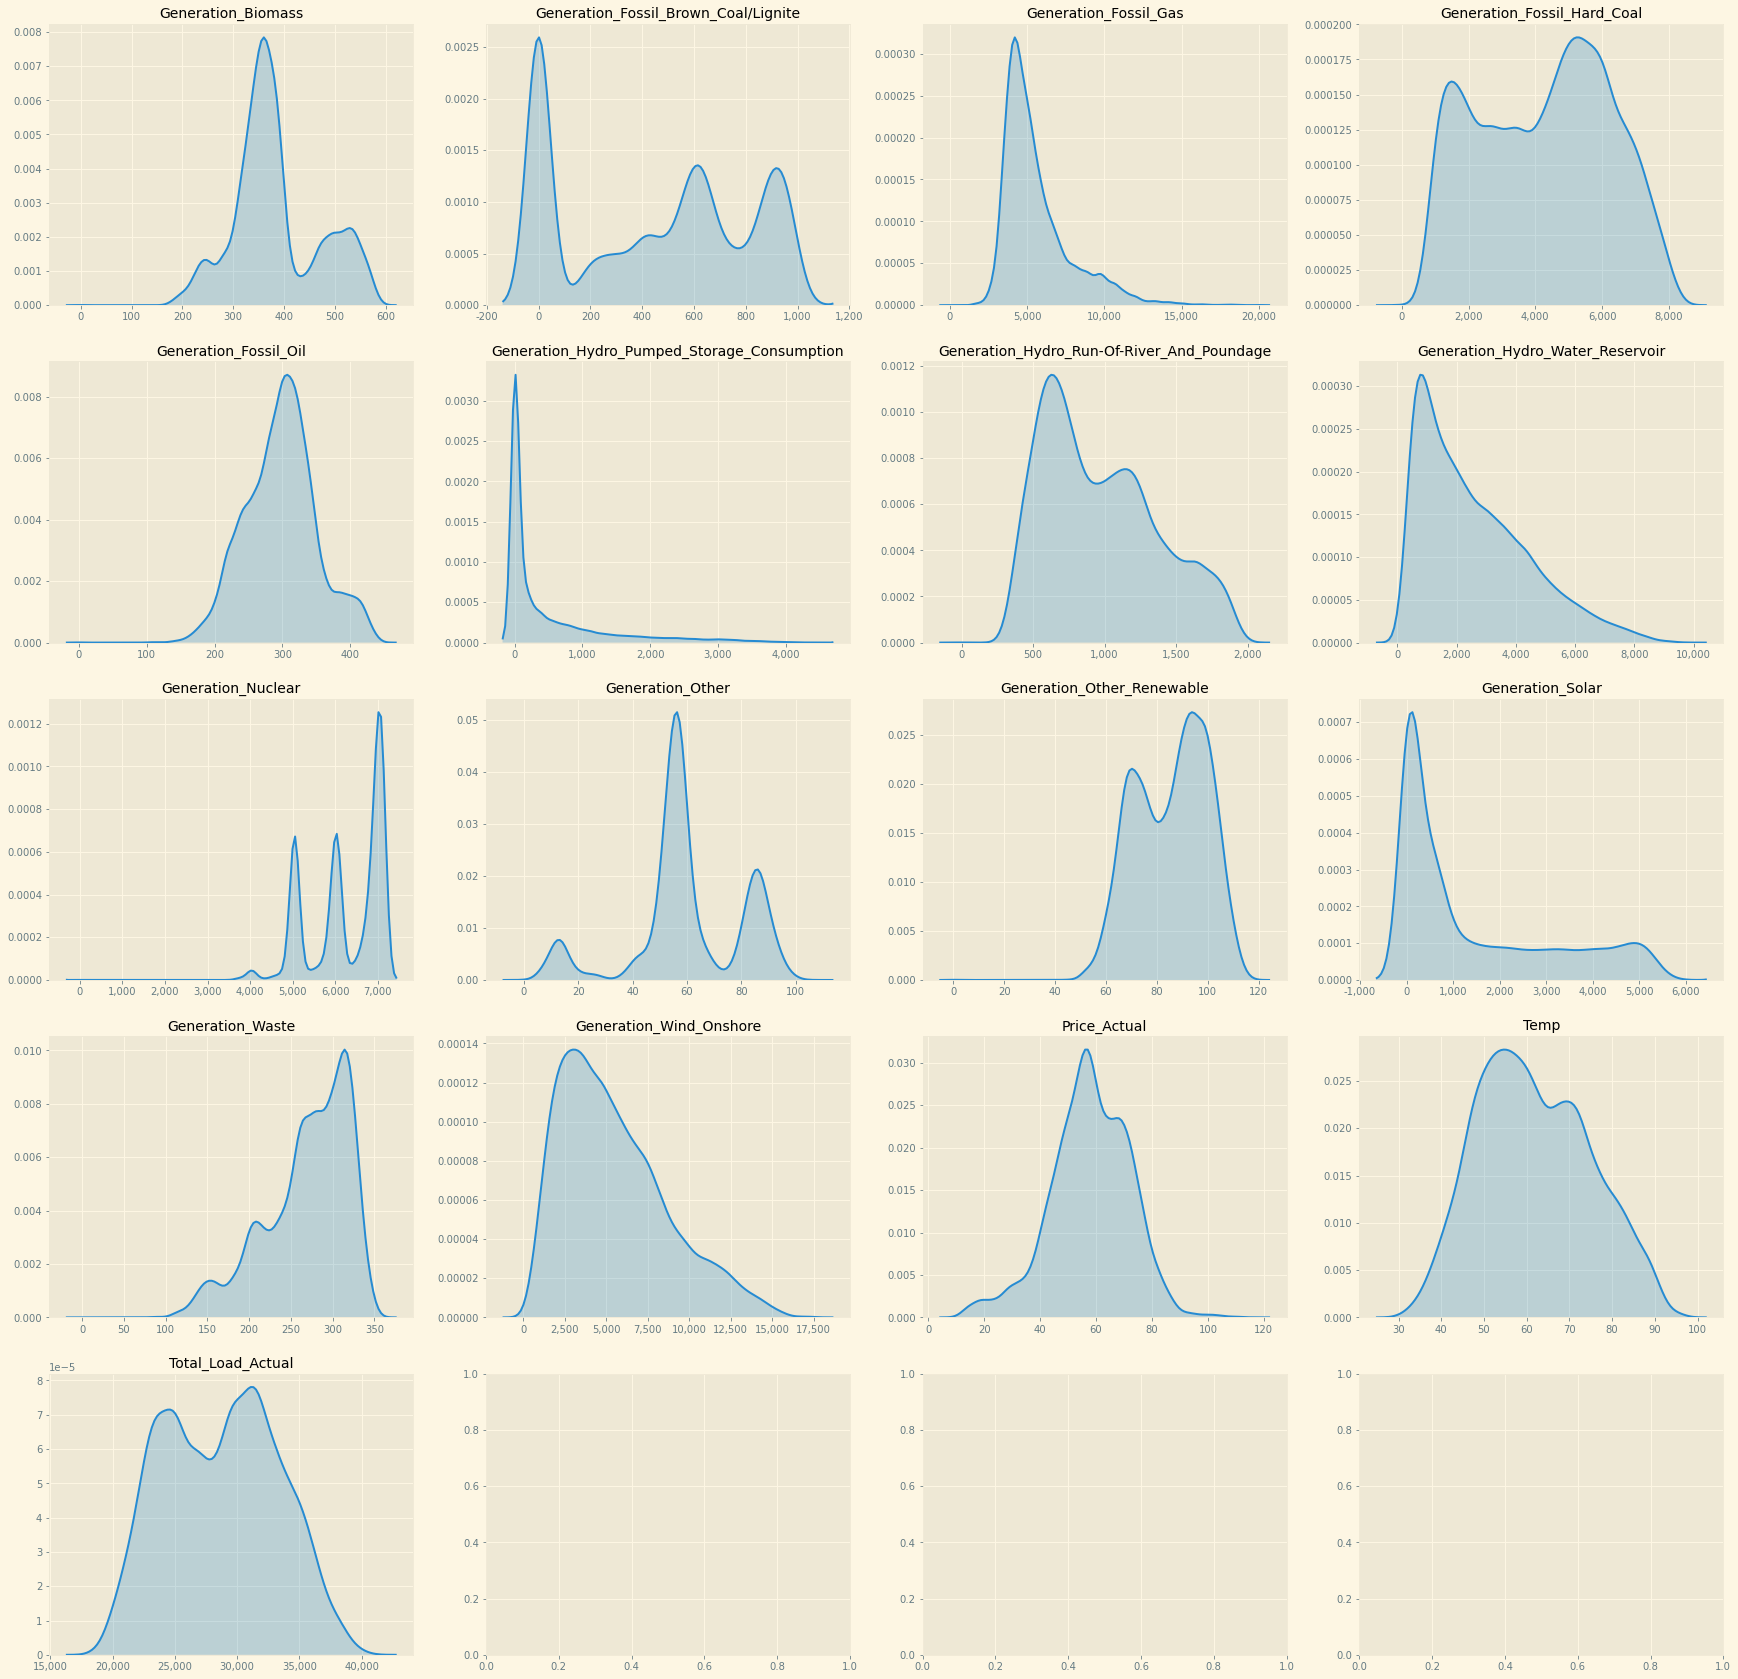

In [47]:
#Set figure
f, axes = plt.subplots(5,4, figsize = (30,30))

#Plot KDE of each variable in df
for col, ax in zip(df.columns, axes.flat):
    sns.kdeplot(df[col], shade = True, legend = False, ax=ax)
   
    ###Set plot aesthetics###
    ax.set_title(str.title(col), fontsize = 14)
    ax.set_xlabel('')
    ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


#Save fig##
plt.savefig(viz_path + '/Data_Distributions.png',bbox_inches='tight')

**Target distribution**

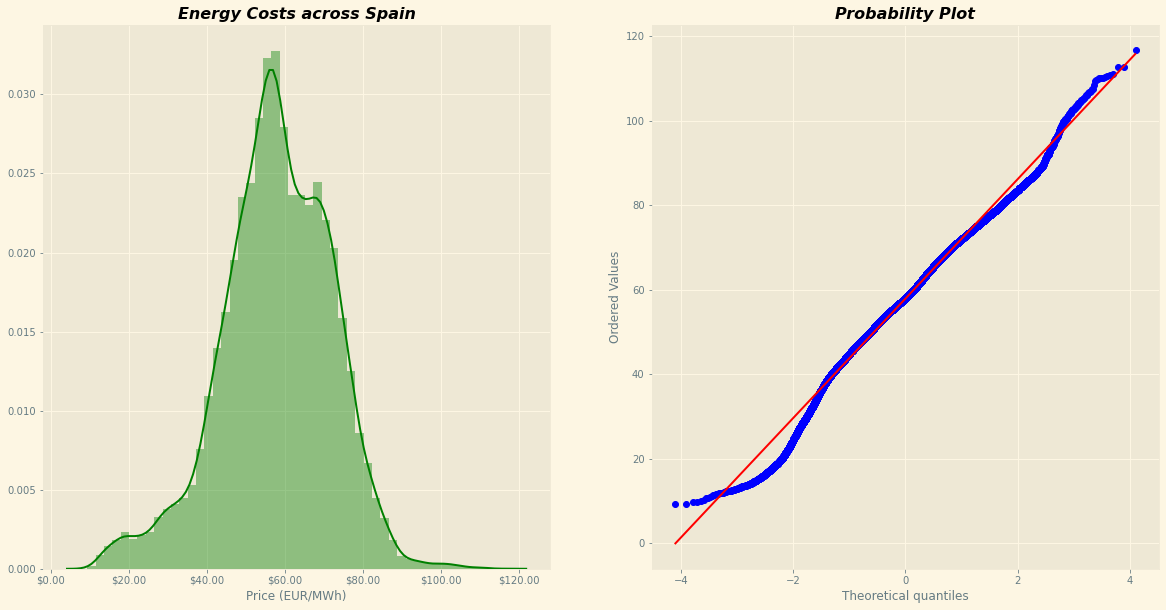

In [48]:
#Set figure
f, ax = plt.subplots(1,2,figsize = (20,10))

#Plot data
sns.distplot(df['price_actual'],color = 'g',ax=ax[0])
stats.probplot(df['price_actual'], plot = ax[1])

###Set plot aesthetics###
#Title
ax[0].set_title('Energy Costs across Spain', fontweight = 'semibold', style = 'italic')
ax[1].set_title('Probability Plot', fontweight = 'semibold', style = 'italic')

#Axes
ax[0].set_xlabel('Price (EUR/MWh)')
ax[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}.00".format(int(x))))


#Save fig##
plt.savefig(viz_path + '/Price_Distribution.png',bbox_inches='tight')

- Run statistics tests and plots against ttarget
- Plot target under variab;e

## Correlations

**Heat Map**

Features most correlated w/ price_actual:
['generation_fossil_gas', 'generation_fossil_hard_coal', 'generation_hydro_pumped_storage_consumption', 'price_actual', 'total_load_actual']


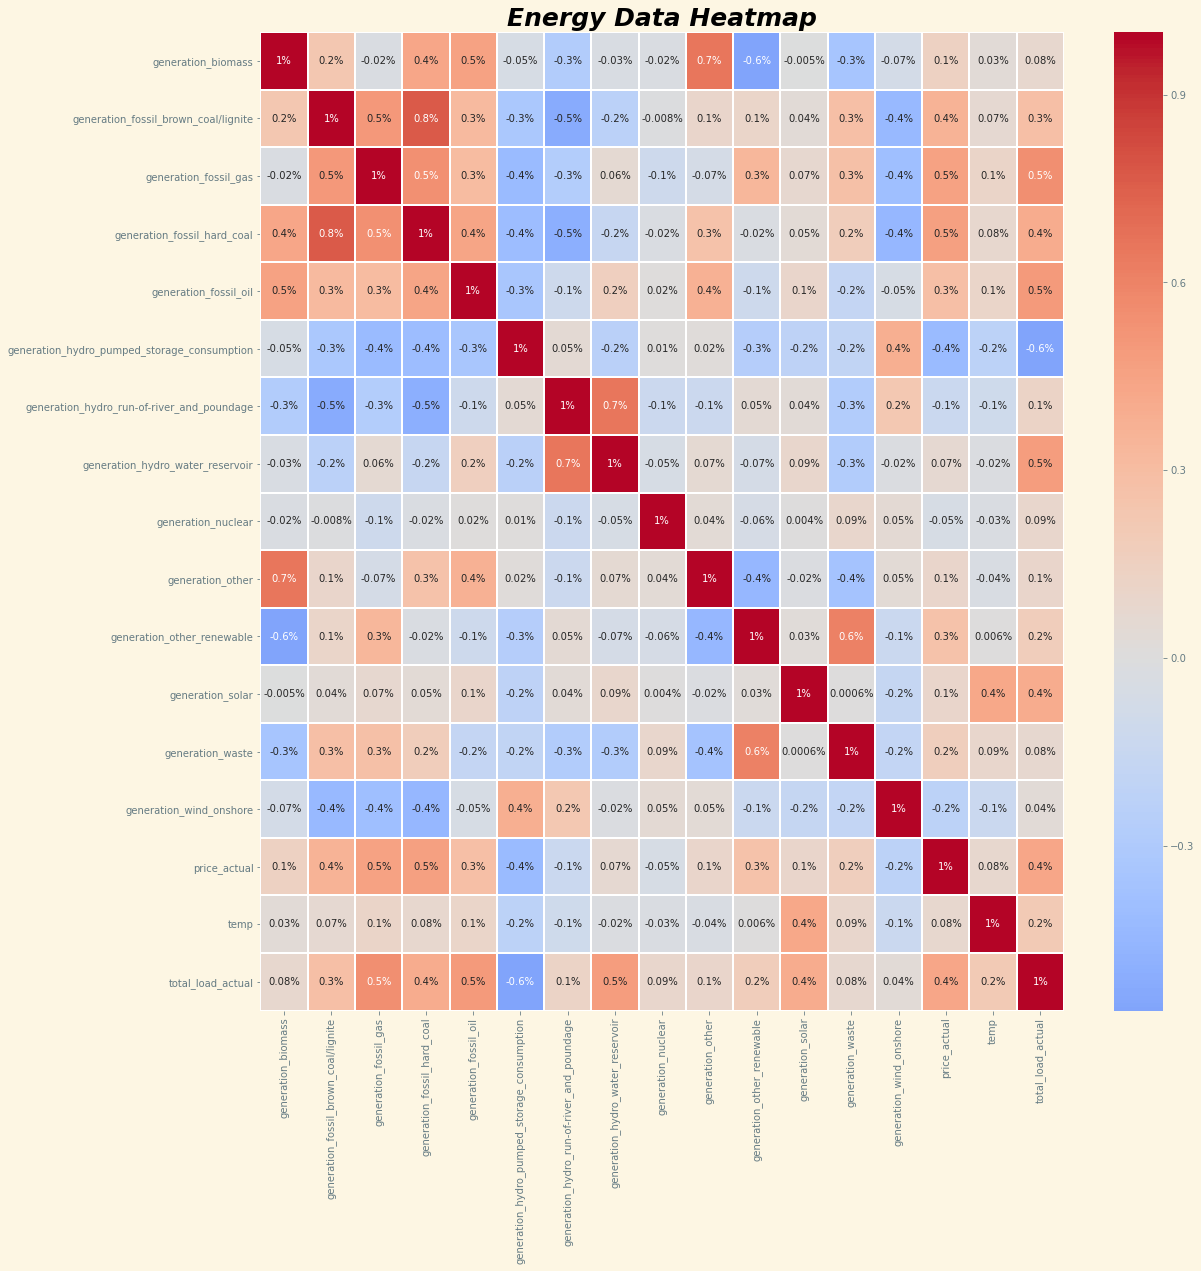

In [87]:
#Set plot
f, ax = plt.subplots(figsize = (18,18))

#Create correlation matrix
corr = df.corr()


#Create heatmap
sns.heatmap(corr, annot=True,fmt='.1g',cmap = 'coolwarm', linewidths=1,annot_kws=None, center = 0,
            linecolor='white', ax = ax)

###Set plot aesthetics###
#Title
ax.set_title('Energy Data Heatmap', fontsize=25,style= 'italic',fontweight= 'semibold')

#Format annotations
for t in ax.texts: t.set_text(t.get_text() + "%")
    
#Subset feature w/ correlations > .4 or < -.4 with price_actual
correlated_features = corr.loc[(corr['price_actual'] > .4)|(corr['price_actual'] < -.4)].index.tolist()

#Print features most correlated w/ target
print('Features most correlated w/ price_actual:\n{}'.format(correlated_features))
    
#Save fig#
plt.savefig(viz_path + '/Correlation_Matrix.png',bbox_inches='tight')

## Price Time Plots

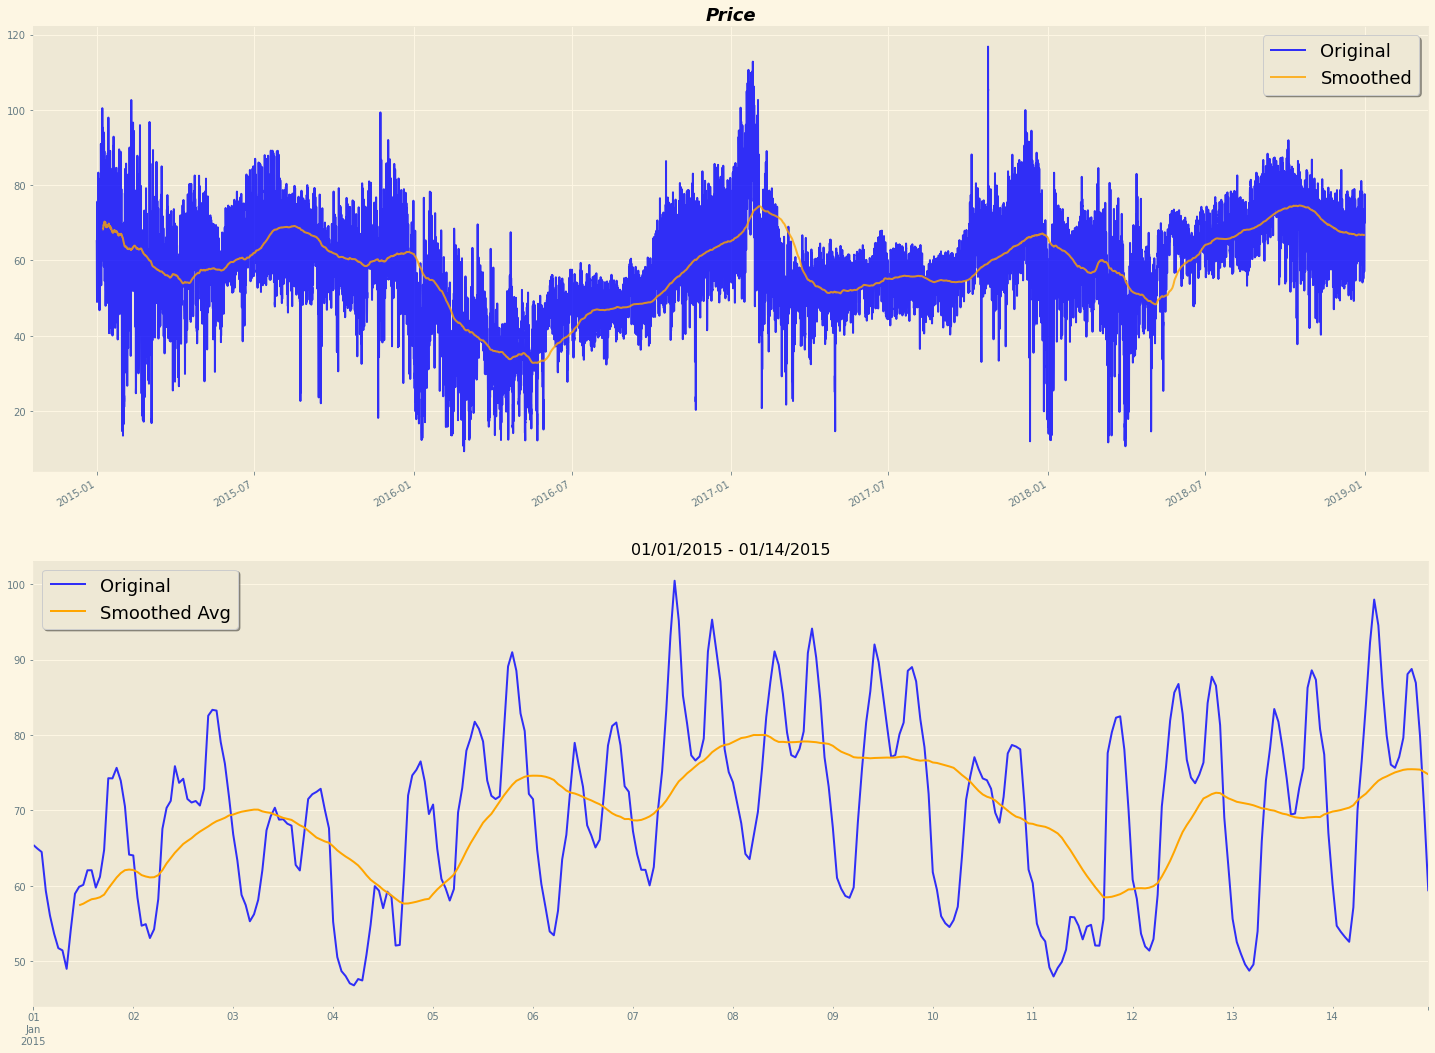

In [91]:
#Plot predictions against actual
from TimeseriesPlotter import timeseries_plot

#Set figure size
f, ax = plt.subplots(2,1, figsize = (25,20))

#PLot raw data
timeseries_plot(df['price_actual'], ax=ax[0], label = 'Original', color = 'blue', alpha = .8)
timeseries_plot(df['price_actual'].rolling(min_periods=24*7, window=24*7*8).mean(), ax=ax[0],title = 'Price', 
                label = 'Smoothed', color = 'orange', alpha = .8, title_dict=title_dict)

#Plot zoomed data
timeseries_plot(df['price_actual'][:24*14], ax=ax[1], label = 'Original',color = 'blue', alpha = .8)
timeseries_plot(df['price_actual'][:24*14].rolling(min_periods=12, window=24).mean(), color = 'orange',ax =ax[1], title = '01/01/2015 - 01/14/2015',label = 'Smoothed Avg')  

ax[0].legend(shadow = True, frameon =True, fontsize = 18)
ax[1].legend(shadow = True, frameon =True, fontsize = 18)
#Save fig#
plt.savefig(viz_path + '/Price_Plot.png',bbox_inches='tight')

### Price Decomposition

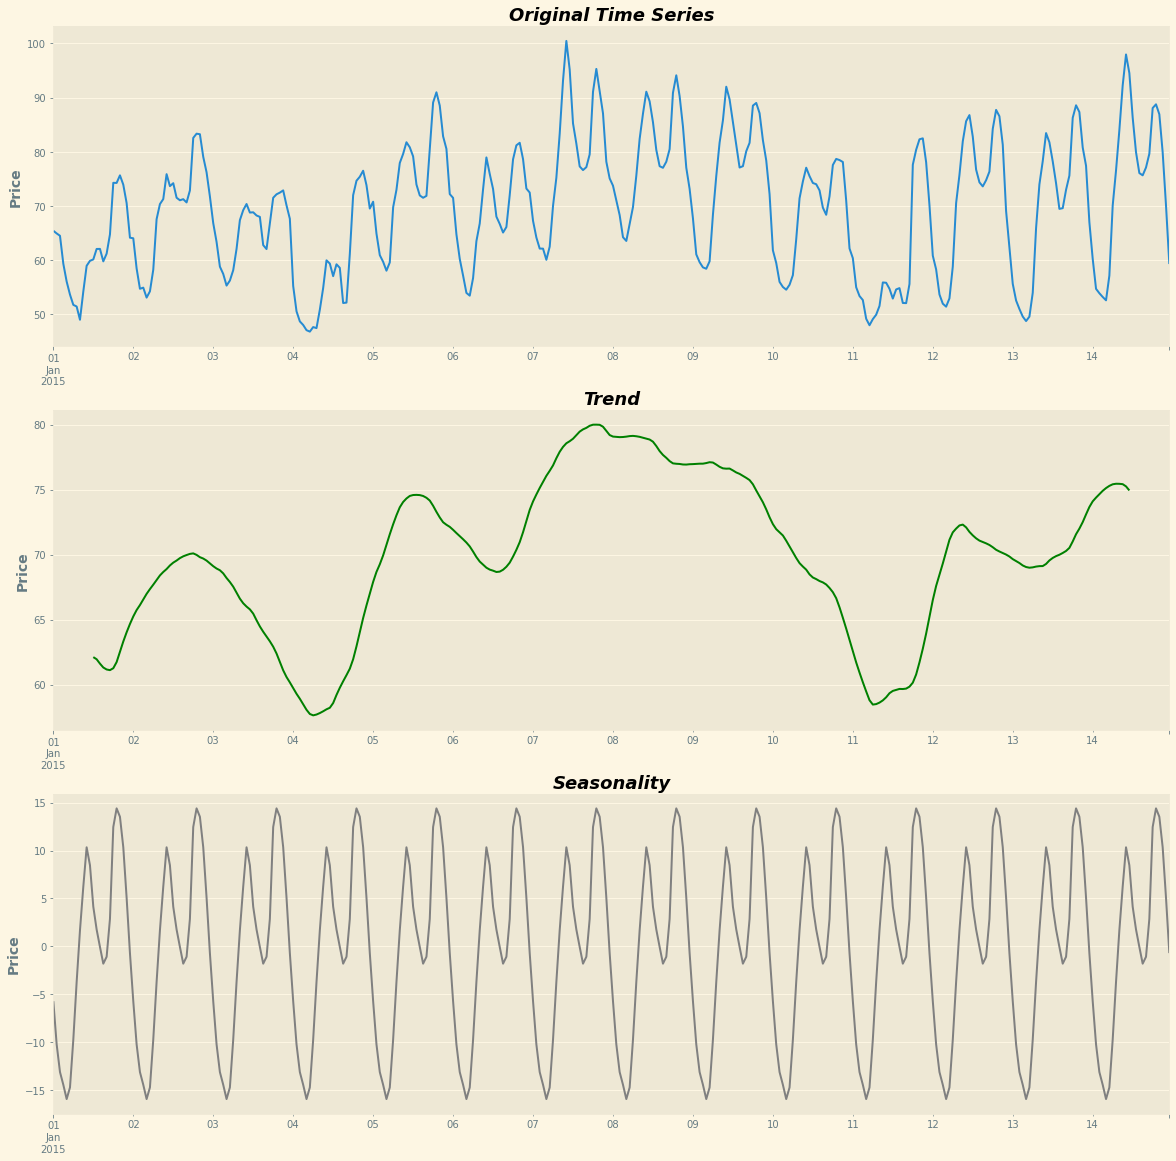

In [51]:
#Read in libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from TimeseriesPlotter import timeseries_plot

#Fit seasonal_decompose to first 2 weeks of data to see what's happening
result = seasonal_decompose(df['price_actual'][:24 * 14], model = 'add', freq=24)

#Create plot
f, ax  = plt.subplots(3,1,figsize=(20,20))

#PLot Components of results
timeseries_plot(result.observed,title = 'Original Time Series',
                title_dict=title_dict, label_dict=label_dict,ax=ax[0], xlabel='',ylabel = 'Price')
timeseries_plot(result.trend,title = 'Trend',
                title_dict=title_dict,label_dict=label_dict, ax=ax[1], xlabel='',ylabel = 'Price', color = 'green')
timeseries_plot(result.seasonal,title = 'Seasonality',
                title_dict=title_dict,label_dict=label_dict, ax=ax[2], xlabel='',ylabel = 'Price', color = 'grey');

## Load Time Plots

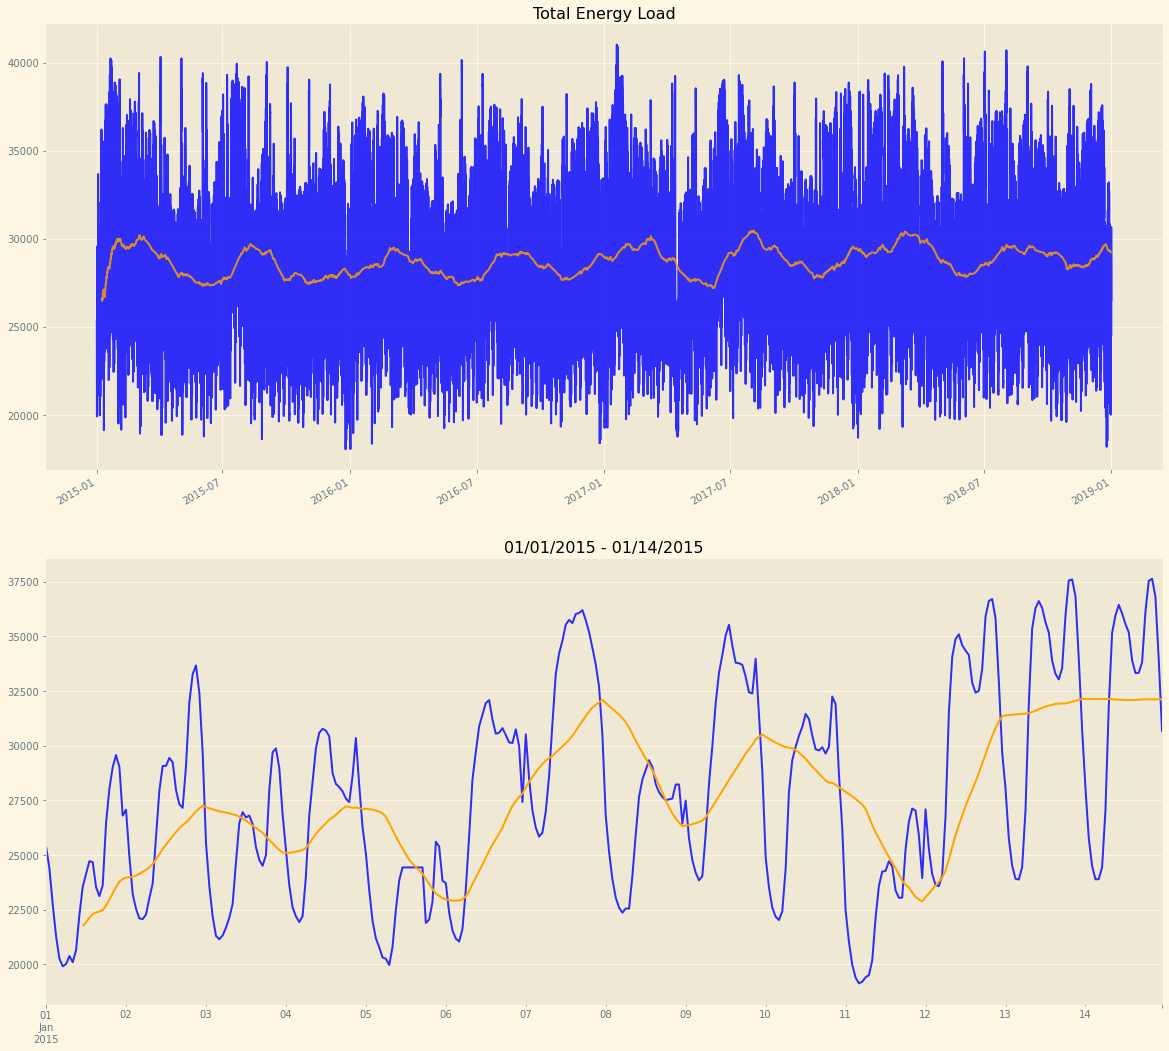

In [52]:
#Set figure size
f, ax = plt.subplots(2,1, figsize = (20,20))

#PLot raw data
timeseries_plot(df['total_load_actual'], ax=ax[0], label = 'Original', color = 'blue', alpha = .8)
timeseries_plot(df['total_load_actual'].rolling(min_periods=24*7, window=24*7*8).mean(), ax=ax[0],title = 'Total Energy Load', label = 'Smoothed', color = 'orange', alpha = .8, )

#Plot zoomed data
timeseries_plot(df['total_load_actual'][:24*14], ax=ax[1], label = 'Original',color = 'blue', alpha = .8)
timeseries_plot(df['total_load_actual'][:24*14].rolling(min_periods=12, window=24).mean(), color = 'orange',ax =ax[1], title = '01/01/2015 - 01/14/2015',label = 'Smoothed Avg')  

    
#Save fig#
plt.savefig(viz_path + '/Load_Plot.png',bbox_inches='tight')

### Load Decomposition

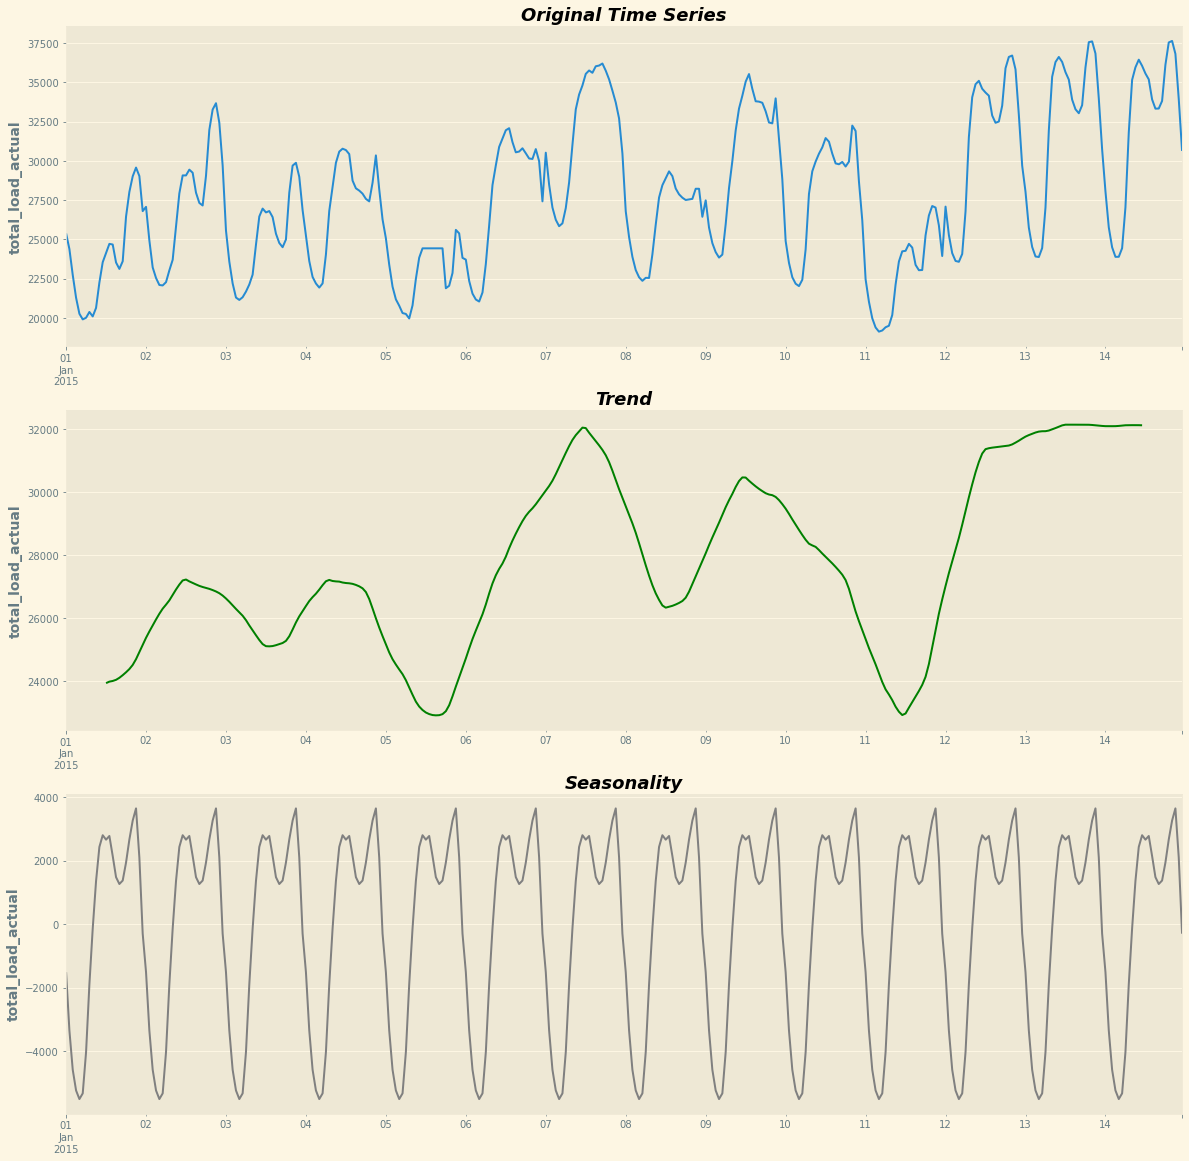

In [53]:
#Fit seasonal_decompose to first 2 weeks of data to see what's happening
result = seasonal_decompose(df['total_load_actual'][:24 * 14], model = 'add', freq=24)

#Create plot
f, ax  = plt.subplots(3,1,figsize=(20,20))

#PLot Components of results
timeseries_plot(result.observed,title = 'Original Time Series',
                title_dict=title_dict, label_dict=label_dict,ax=ax[0], xlabel='',ylabel = 'total_load_actual')
timeseries_plot(result.trend,title = 'Trend',
                title_dict=title_dict,label_dict=label_dict, ax=ax[1], xlabel='',ylabel = 'total_load_actual', color = 'green')
timeseries_plot(result.seasonal,title = 'Seasonality',
                title_dict=title_dict,label_dict=label_dict, ax=ax[2], xlabel='',ylabel = 'total_load_actual', color = 'grey');

#Set plot aesthetics
plt.suptitle(y=.89, t='Features Zoomed-In 30 Days (01/01/2015 - 01/30/2015)',fontsize = 24, fontweight = 'semibold')


## PLot all Time Series

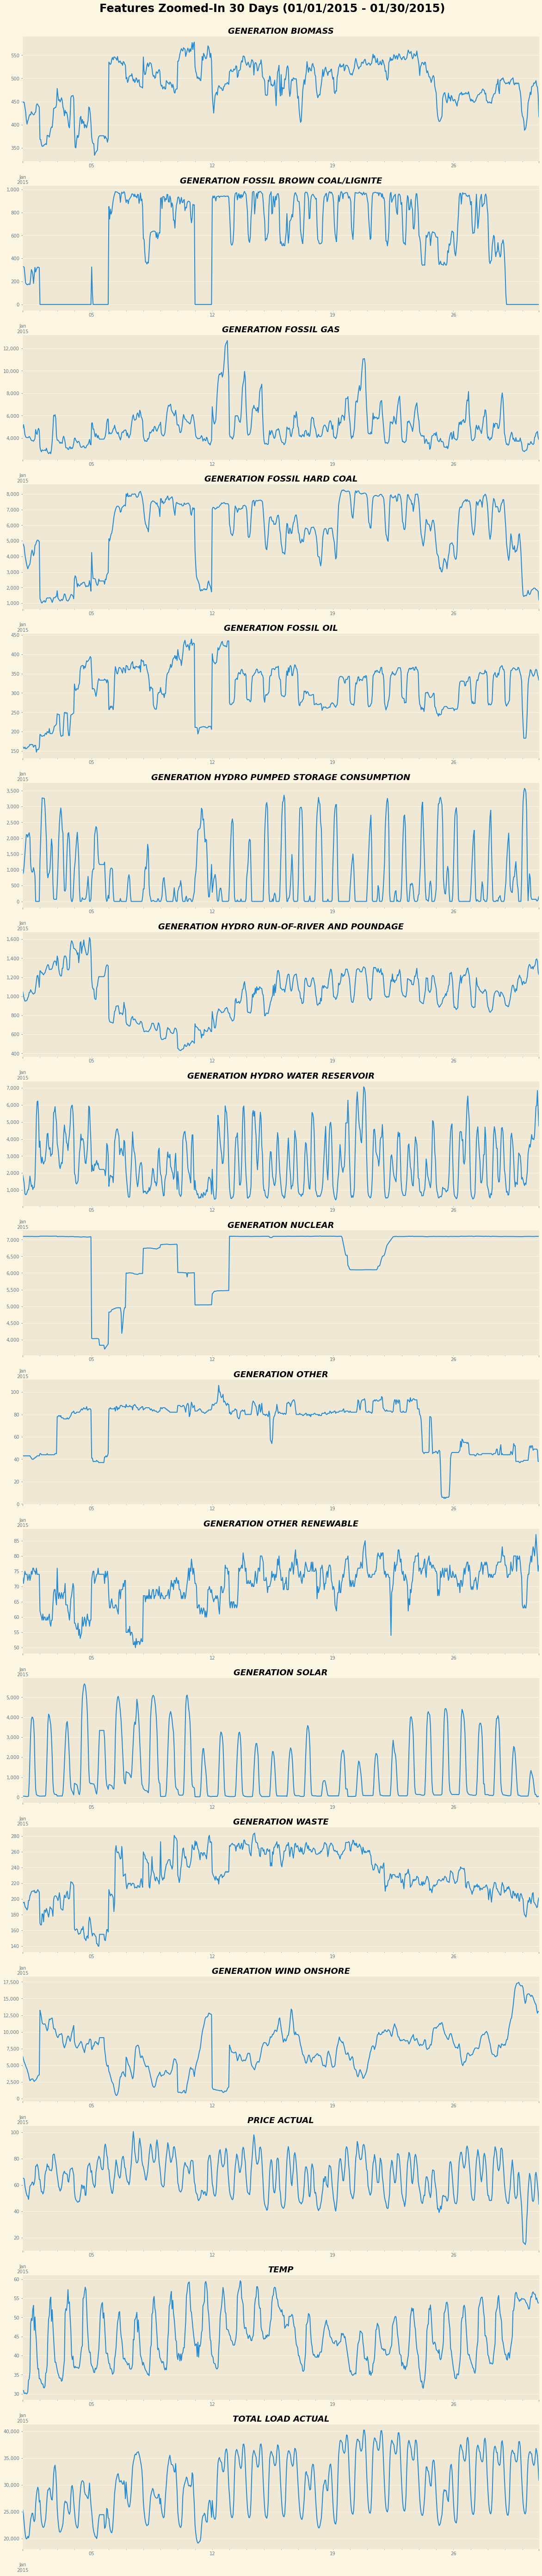

In [81]:
#Set Figure
f, axes = plt.subplots(len(df.columns),1, figsize=(20,100))

#Plot Raw data
for col, ax in zip(df.columns, axes.flatten()):
    timeseries_plot(df[col][:24*30], ax=ax, title = str.upper(col.replace('_',' ')), title_dict=title_dict)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#Set plot aesthetics
plt.suptitle(y=.89, t='Features Zoomed-In 30 Days (01/01/2015 - 01/30/2015)',fontsize = 24, fontweight = 'semibold')

#Save figure
plt.savefig(viz_path + '/All_Timelots_Zoomed.png',bbox_inches='tight')